In [38]:
# TensorFlow and tf.keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [37]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

# CIFAR10 dataset - 32x32 colour images. 50,000 images for training. 10,000 for testing. 10 classes
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalise pixel values to be between 0 and 1
train_images, test_images = train_images / 255, test_images / 255

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print('Train images: {}\tTrain lables: {}'.format(train_images.shape, len(train_labels)))
print('Test images: {}\tTest lables: {}'.format(test_images.shape, len(test_labels)))

Train images: (50000, 32, 32, 3)	Train lables: 50000
Test images: (10000, 32, 32, 3)	Test lables: 10000


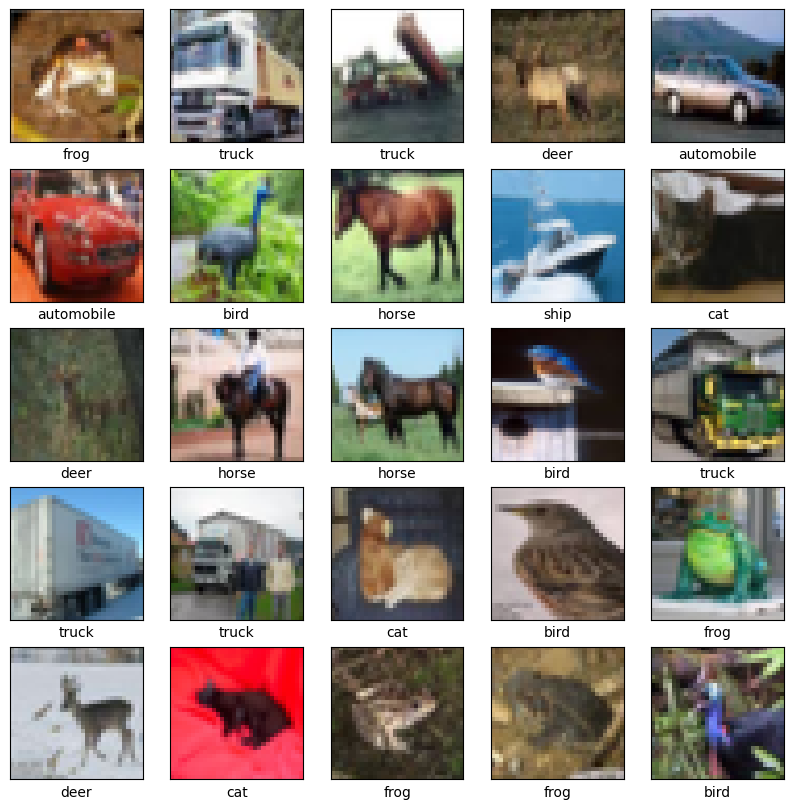

In [7]:
# Verify the data by plotting the first few images in the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(train_images[i])
    # The CIFAR labels are singular arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [39]:
# Build the convolutional neural network, specifying each of the layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(), # Backpropagation (algorithm for gradient descent)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function
              metrics=['accuracy']) # Fraction of images correctly classified

In [43]:
# Train the network
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 1.3119 - accuracy: 0.5286 - val_loss: 1.1777 - val_accuracy: 0.5829
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0808 - accuracy: 0.6202 - val_loss: 1.0616 - val_accuracy: 0.6242
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9466 - accuracy: 0.6682 - val_loss: 0.9366 - val_accuracy: 0.6756
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8570 - accuracy: 0.6999 - val_loss: 0.9116 - val_accuracy: 0.6870
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7955 - accuracy: 0.7198 - val_loss: 0.9026 - val_accuracy: 0.6906
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7435 - accuracy: 0.7408 - val_loss: 0.9131 - val_accuracy: 0.6883
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6907 - accuracy: 0.7580 - val_loss: 0.9119 -

313/313 [==============================] - 3s 9ms/step - loss: 0.9063 - accuracy: 0.7072


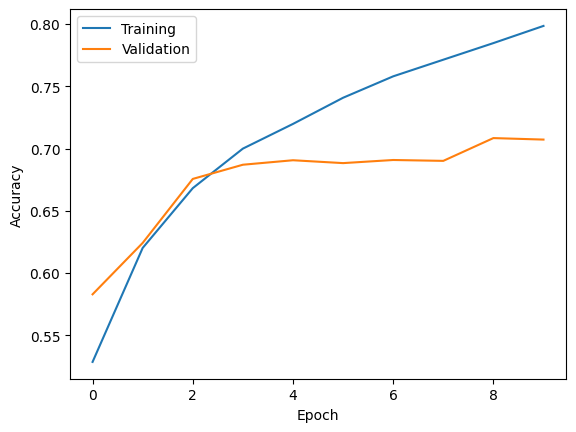

In [58]:
# Evaluating the network
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

loss, acc = model.evaluate(test_images,  test_labels)

In [45]:
# Predict the label for each image in the test set
predictions = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [63]:
 def plot_image(predictions, label, img):
    plt.xticks([]), plt.yticks([])
    plt.imshow(img)
    predicted_label = np.argmax(predictions)
    colour = 'blue' if predicted_label == label else 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100 * np.max(predictions), class_names[label]), color=colour)

def plot_value_array(predictions, label):
    plt.xticks(range(10)), plt.yticks([])
    plot = plt.bar(range(10), predictions, color='gray')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions)
    plot[predicted_label].set_color('red')
    plot[label].set_color('blue')

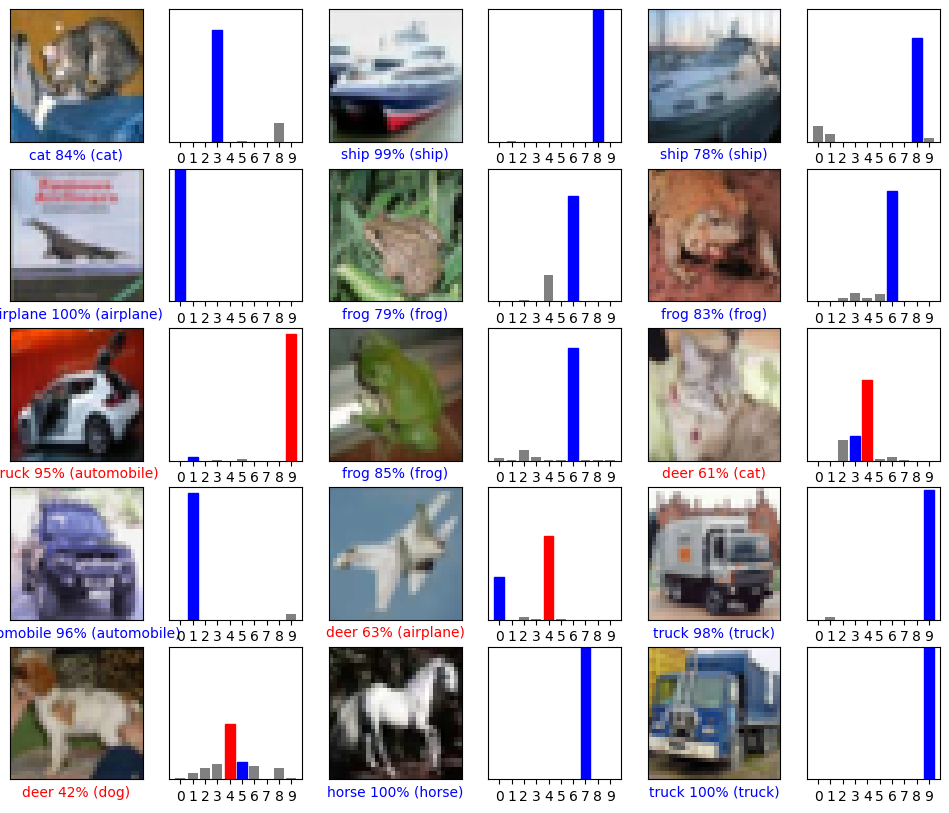

In [64]:
# Plot the first test images, their predicted labels, and the true labels
# Correct predictions are blue and incorrect predictions are red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions[i], test_labels[i][0], test_images[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(predictions[i], test_labels[i][0])
plt.show()

1/1 [==============================] - 0s 51ms/step
airplane


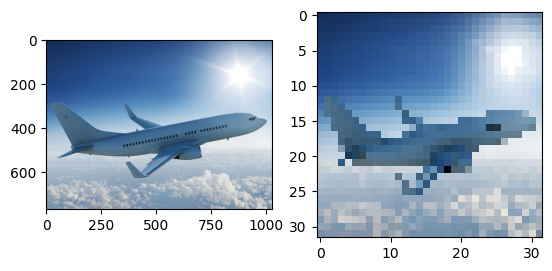

In [131]:
def preprocess(image):
    img_resize = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img_norm = img_resize / 255
    return img_norm

fig, axs = plt.subplots(1, 2)
img = plt.imread('data/plane.jpg')
axs[0].imshow(img)
img = preprocess(img)
axs[1].imshow(img)

img = np.expand_dims(img, axis=0)
predicted = np.argmax(model.predict(img))
print(class_names[predicted])